In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [8]:
os.chdir('C:/Users/krish/Desktop/mayur/Python for datascience and machine learning/original (2)/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests')
df = pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


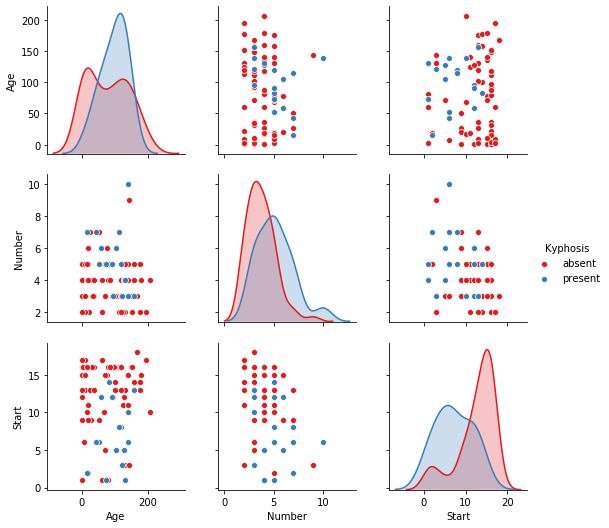

In [9]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtree = DecisionTreeClassifier()

In [31]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
predictions = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.81      0.89      0.85        19
     present       0.50      0.33      0.40         6

    accuracy                           0.76        25
   macro avg       0.65      0.61      0.62        25
weighted avg       0.74      0.76      0.74        25



In [33]:
print(confusion_matrix(y_test,predictions))

[[20  1]
 [ 4  0]]


# Tree Visualization

In [46]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

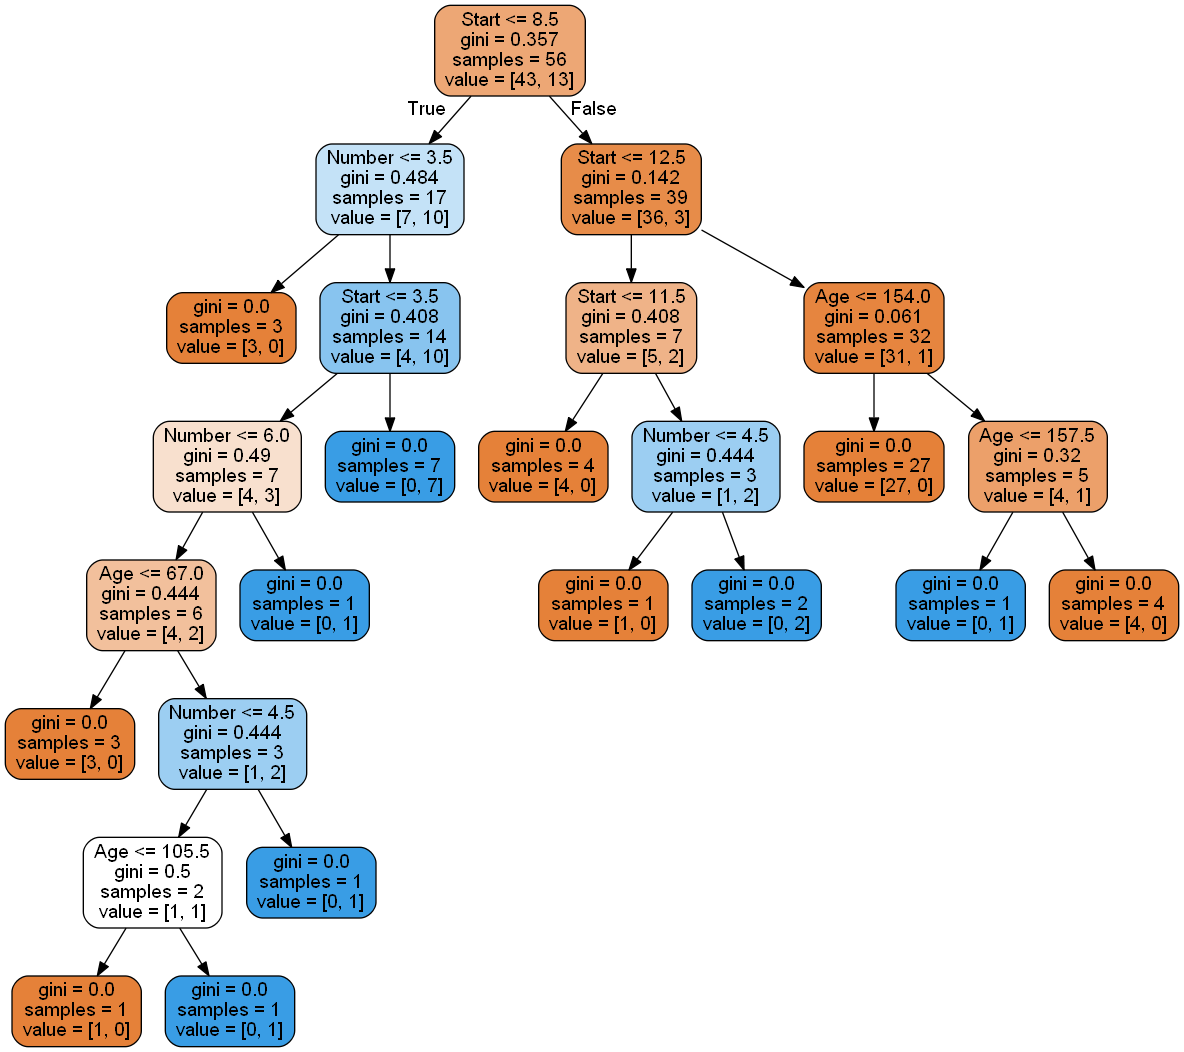

In [47]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
rfc_pred = rfc.predict(X_test)

In [42]:
print(confusion_matrix(y_test,rfc_pred))

[[18  3]
 [ 4  0]]


In [43]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      0.86      0.84        21
     present       0.00      0.00      0.00         4

    accuracy                           0.72        25
   macro avg       0.41      0.43      0.42        25
weighted avg       0.69      0.72      0.70        25

